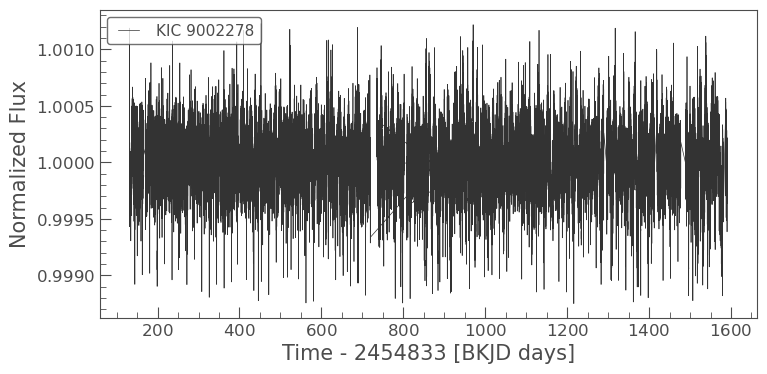

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import lightkurve as lk

klc = lk.search_lightcurve("Kepler 62", author="Kepler", cadence="long")
klc_collection = klc.download_all()
klc_stitched = klc_collection.stitch().flatten(window_length = 901).remove_outliers()
klc_stitched.plot()
plt.show()

Lightcurve data is pulled from an opensource databank. In this case the specified target is Kepler-62 - data from 17 quarters is stitched together and normalized.

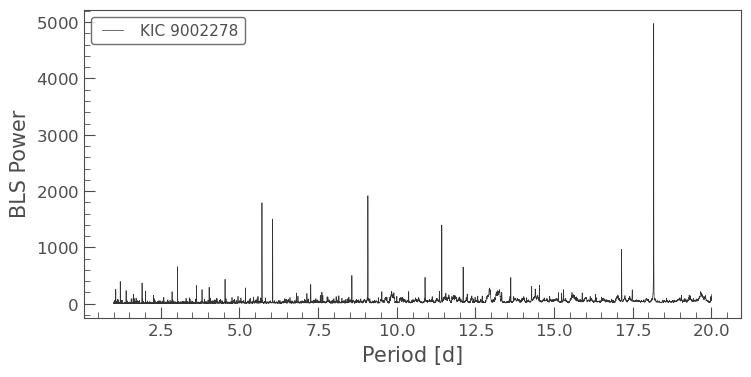

In [2]:
period = np.linspace(1, 20, 10000)
bls_b = klc_stitched.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_b.plot()
#plt.xlim(13,13.5)
plt.show()

In [3]:
period_b = bls_b.period_at_max_power
transit_time_b = bls_b.transit_time_at_max_power
duration_b = bls_b.duration_at_max_power

print('planet b period = ' + str(period_b))

planet b period = 18.164416441644164 d


The data is converted to a periodogram to identify periodic changes in flux, indicative of a transiting exoplanet. In this case, a clear signal is seen with a periodicity of 18.16 days. The initial search range is between periods of 1 and 20 days.

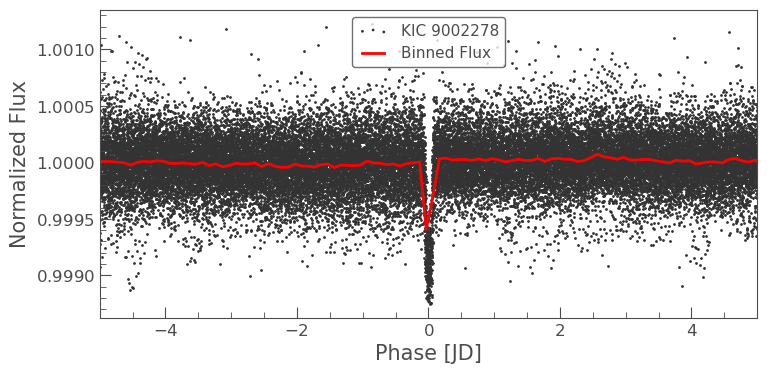

In [4]:
correction = 1
ax = klc_stitched.fold(period = period_b*correction, epoch_time = transit_time_b).scatter()
klc_stitched.fold(period_b*correction, transit_time_b).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()

Phase folding is performed using the identified period to confirm there are dips in flux occurring at these intervals. This is also helpful in differentiating between true orbital periods and aliases i.e an alias at x2 the true period would show two dips in flux in the phase fold chart. 

The first planet in the system has been detected.

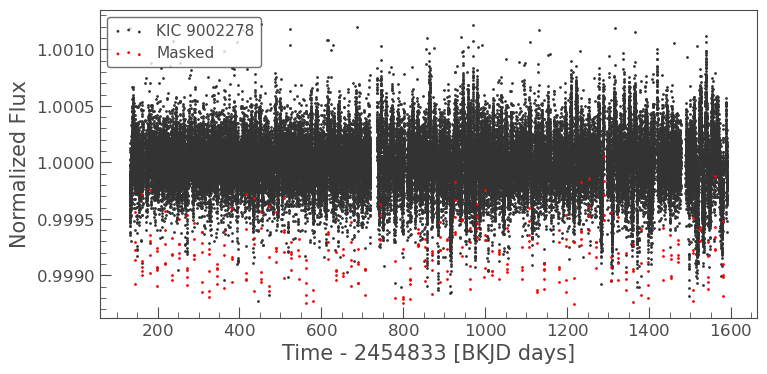

In [5]:
b_planet_mask = klc_stitched.create_transit_mask(period = [period_b], transit_time = [transit_time_b], duration = [duration_b])
masked_lc_b = klc_stitched[~b_planet_mask]
ax = masked_lc_b.scatter()
klc_stitched[b_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
plt.show()

A transit mask is applied to remove the signal associated with the previous exoplanet.

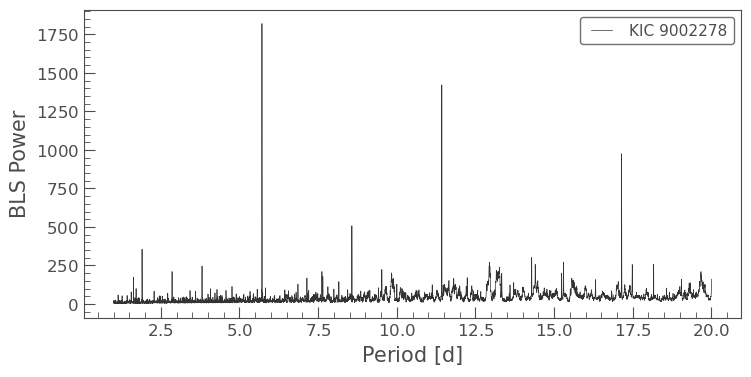

In [7]:
period = np.linspace(1, 20, 10000)
bls_c = masked_lc_b.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_c.plot()
plt.show()

In [8]:
period_c = bls_c.period_at_max_power
transit_time_c = bls_c.transit_time_at_max_power
duration_c = bls_c.duration_at_max_power

print('planet c period = ' + str(period_c))

planet c period = 5.714371437143715 d


A periodogram is constructed from the masked data and another signal can be seen with a periodicity of 5.71 days.

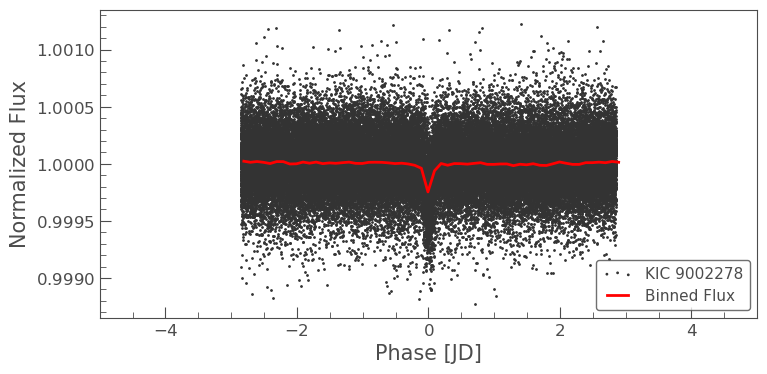

In [9]:
ax = masked_lc_b.fold(period = period_c, epoch_time = transit_time_c).scatter()
masked_lc_b.fold(period_c, transit_time_c).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()

Phase folding is repeated to confirm the signal.

This process is iteratively repeated with various period search ranges until all exoplanet candidates are detected.

In [10]:
#c_planet_model = bls_c.get_transit_model(period = period_c, transit_time = transit_time_c, duration = duration_c)
#ax = klc_stitched.fold(period_c, transit_time_c).scatter()
#c_planet_model.fold(period_c, transit_time_c).plot(ax = ax, c = 'r', lw = 2)
#plt.show()

In [11]:
c_planet_mask = klc_stitched.create_transit_mask(period = [period_b, period_c], transit_time = [transit_time_b, transit_time_c], duration = [duration_b, duration_c])
masked_lc_c = klc_stitched[~c_planet_mask]
#ax = masked_lc_c.scatter()
#klc_stitched[c_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
#plt.show()

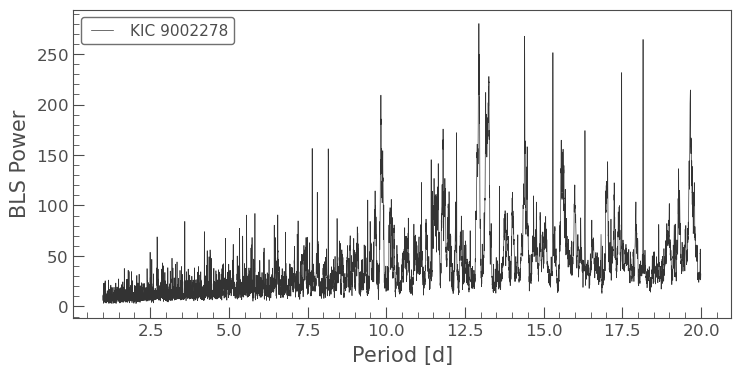

In [34]:
period = np.linspace(1, 20, 10000)
bls_d = masked_lc_c.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_d.plot()
plt.show()

In [35]:
period_d = bls_d.period_at_max_power
transit_time_d = bls_d.transit_time_at_max_power
duration_d = bls_d.duration_at_max_power

print('planet d period = ' + str(period_d))

planet d period = 12.946494649464947 d


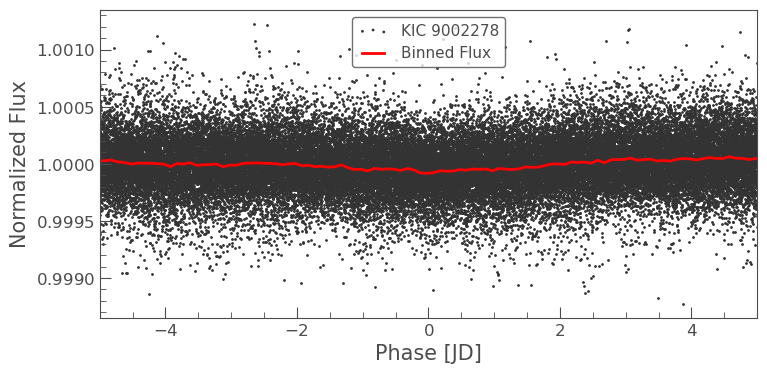

In [36]:
ax = masked_lc_c.fold(period = period_d, epoch_time = transit_time_d).scatter()
masked_lc_c.fold(period_d, transit_time_d).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()

In this case, there are no clear signals in the periodogram and the phase fold chart shows no clear change in flux. Hence the period search range will need to be broadened.

In [37]:
#d_planet_model = bls_d.get_transit_model(period = period_d, transit_time = transit_time_d, duration = duration_d)
#ax = klc_stitched.fold(period_d, transit_time_d).scatter()
#d_planet_model.fold(period_d, transit_time_d).plot(ax = ax, c = 'r', lw = 2)
#plt.show()

In [38]:
d_planet_mask = klc_stitched.create_transit_mask(period = [period_b, period_c, period_d], transit_time = [transit_time_b, transit_time_c, transit_time_d], duration = [duration_b, duration_c, duration_d])
masked_lc_d = klc_stitched[~d_planet_mask]
#ax = masked_lc_d.scatter()
#klc_stitched[d_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
#plt.show()

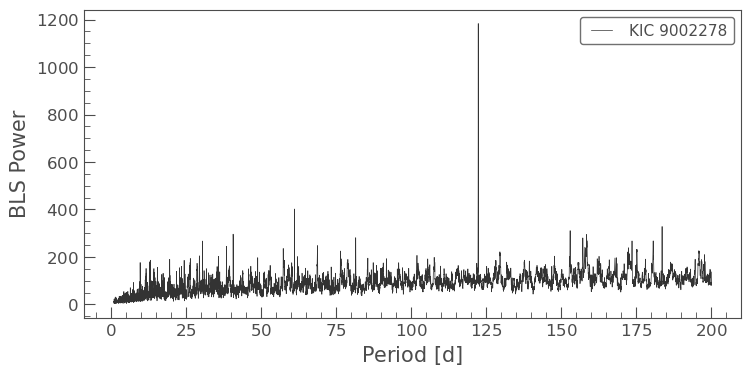

In [46]:
period = np.linspace(1, 200, 10000)
bls_e = masked_lc_d.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_e.plot()
plt.show()

In [47]:
period_e = bls_e.period_at_max_power
transit_time_e = bls_e.transit_time_at_max_power
duration_e = bls_e.duration_at_max_power

print('planet e period = ' + str(period_e))

planet e period = 122.38223822382238 d


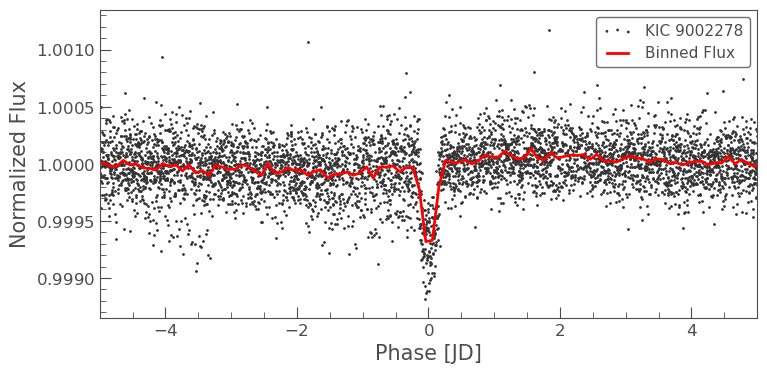

In [48]:
ax = masked_lc_d.fold(period = period_e, epoch_time = transit_time_e).scatter()
masked_lc_d.fold(period_e, transit_time_e).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()

Broadening the search range reveals another clear signal with a periodicity of 122.38 days, confirmed with the phase fold chart.
Beyond this range, no clear signals were identified.

In [49]:
e_planet_mask = klc_stitched.create_transit_mask(period = [period_b, period_c, period_d, period_e], transit_time = [transit_time_b, transit_time_c, transit_time_d, transit_time_e], duration = [duration_b, duration_c, duration_d, duration_e])
masked_lc_e = klc_stitched[~e_planet_mask]
#ax = masked_lc_d.scatter()
#klc_stitched[d_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
#plt.show()

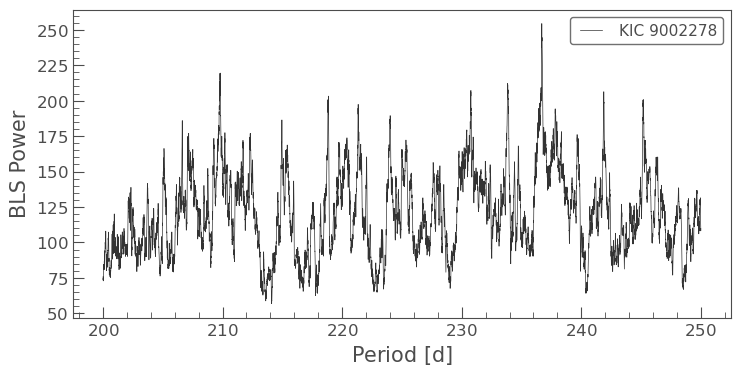

In [52]:
period = np.linspace(200, 250, 10000)
bls_f = masked_lc_e.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_f.plot()
plt.show()

In [53]:
period_f = bls_f.period_at_max_power
transit_time_f = bls_f.transit_time_at_max_power
duration_f = bls_f.duration_at_max_power

print('planet f period = ' + str(period_f))

planet f period = 236.6986698669867 d


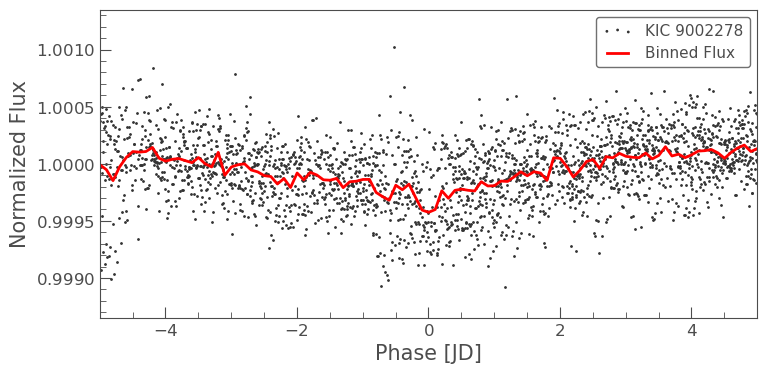

In [54]:
ax = masked_lc_e.fold(period = period_f, epoch_time = transit_time_f).scatter()
masked_lc_e.fold(period_f, transit_time_f).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()

In [55]:
f_planet_mask = klc_stitched.create_transit_mask(period = [period_b, period_c, period_d, period_e, period_f], transit_time = [transit_time_b, transit_time_c, transit_time_d, transit_time_e, transit_time_f], duration = [duration_b, duration_c, duration_d, duration_e, duration_f])
masked_lc_f = klc_stitched[~f_planet_mask]
#ax = masked_lc_d.scatter()
#klc_stitched[d_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
#plt.show()

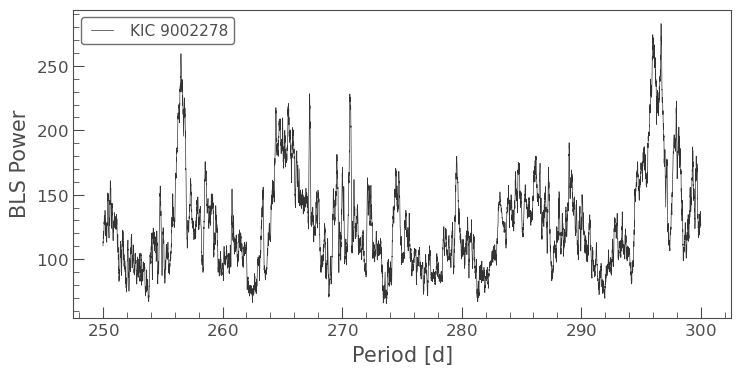

In [56]:
period = np.linspace(250, 300, 10000)
bls_g = masked_lc_f.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_g.plot()
plt.show()

In [57]:
period_g = bls_g.period_at_max_power
transit_time_g = bls_g.transit_time_at_max_power
duration_g = bls_g.duration_at_max_power

print('planet g period = ' + str(period_g))

planet g period = 296.67466746674666 d


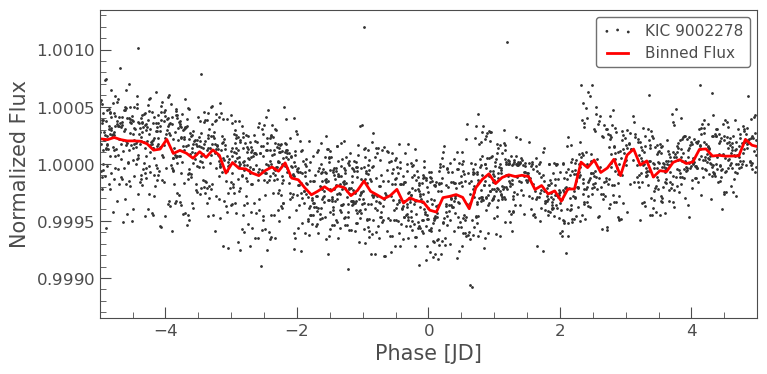

In [58]:
ax = masked_lc_f.fold(period = period_g, epoch_time = transit_time_g).scatter()
masked_lc_f.fold(period_g, transit_time_g).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()

In [59]:
g_planet_mask = klc_stitched.create_transit_mask(period = [period_b, period_c, period_d, period_e, period_f, period_g], transit_time = [transit_time_b, transit_time_c, transit_time_d, transit_time_e, transit_time_f, transit_time_g], duration = [duration_b, duration_c, duration_d, duration_e, duration_f, duration_g])
masked_lc_g = klc_stitched[~g_planet_mask]
#ax = masked_lc_d.scatter()
#klc_stitched[d_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
#plt.show()

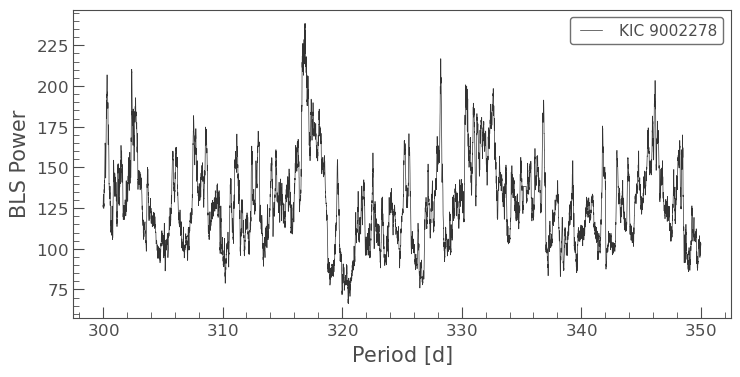

In [60]:
period = np.linspace(300, 350, 10000)
bls_h = masked_lc_g.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_h.plot()
plt.show()

In [61]:
period_h = bls_h.period_at_max_power
transit_time_h = bls_h.transit_time_at_max_power
duration_h = bls_h.duration_at_max_power

print('planet h period = ' + str(period_h))

planet h period = 316.89668966896687 d


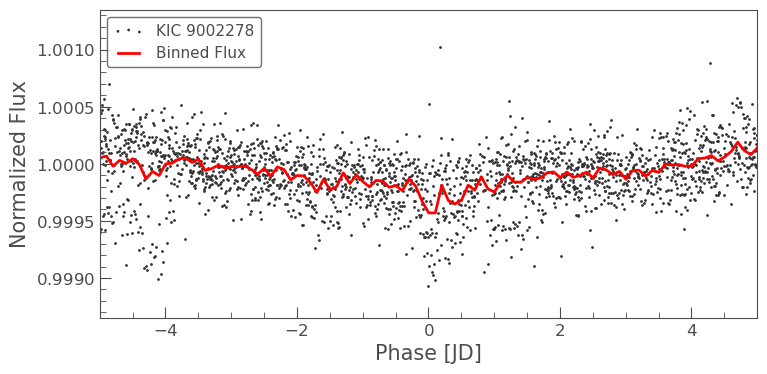

In [62]:
ax = masked_lc_g.fold(period = period_h, epoch_time = transit_time_h).scatter()
masked_lc_g.fold(period_h, transit_time_h).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()